 ### PRÁCTICA FINAL DEL CURSO
 
 #### Estudiante: Richard Douglas Grijalba
 
 #### Modalidad Virutal  - Grow Up.

#### Se solicita: 
* Realice carga de los paquetes necesarios para ejecutar el análisis
* cargue el conunto de datos y realice la exploración de la información
* Ejecute un Análisi Exploratorio que debe contar con lo siguiente:
        -Valide si existen valores nulos
        -revise si las variables de gasto contiene valores atípicos y la distribucion de los datos (en caso de existir                    debe tratarlos)
        -Realice Matrix de Correlación
        
* Convierta las variables categóricas de texto en variables categóricas numéricas (ejemplo con get_dummies)
* Separar los datos en un conjunto de datos de entrenamiento y de prueba
* Estandarice las variables X del conunto de dato s(X_train) para ello puede utilizar ejemplo StandarScaler
* Realice Tres diferentes modelos de regresión para luego validar cual brinda la mejor precisión (SVR, Lasso, XGBoost)
* Evalúa el modelo con 2 diferentes métricas para validar su precisión
* Seleccione el algrotimo e indicar porqué fue seleccionado.

**Informacion del Dataset**

**Detalle de las columnas:**

* Serial No. = # de Folio de Admisión
* GRE Score = Puntaje de exámenes de registros de graduados.
* TOEFL Score = Prueba de puntaje de inglés como lengua extranjera 
* University Rating = Rango de la Universidad
* CGPA=Promedio de Calificaciones Acumulativo
* Research = Investigación
* Chance of Admit = Posibilidad de Admisión 

### 1-Carga y Exploración de Datos

In [1]:
# importar algunas librerias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Importación de los Datos**

In [2]:
df = pd.read_csv('C:\\Users\\Rdouglas\\Documents\\Python Scripts\\M_dat_final_ML_regresion\\Admisiones.csv')

df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Revisión de los Datos**

In [3]:
df.head()  # se presentan los primeros datos del dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


**Realizar una revisión del tamaño de las dimensiones del dataframe.**

In [5]:
# Realizar una revisión del tamaño de las dimensiones del dataframe.

print('Dimensiones: '+str(df.shape))
print('---')

#podemos revisar el nombre de las columnas presentes en el dataframe 
print('Nombre de Columnas: ')
print(df.columns)
print('---')

# se puede tambien revisar el de dato de cada columnas
print('Tipos de Variables')
print(df.dtypes)

Dimensiones: (400, 9)
---
Nombre de Columnas: 
Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')
---
Tipos de Variables
Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object


In [6]:
print("Numero de filas: "+ str(df.shape[0]))
print("Numero de Columnas: "+ str(df.shape[1]))

Numero de filas: 400
Numero de Columnas: 9


In [7]:
df.info()  # se procede a presentar la información general de los datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


**Exploración de Información Estadística del Data Frame**

In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


**Revision de Valores Nulos**

In [9]:
df.isna().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [10]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [11]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Realice el EDA - Análisi Exploratorio de Datos

**Se procede a utilizar parte de las funciones aprendidas en el desarrollo de cursos previos**

In [12]:
def explorarVariableContinua(pDatos,pAtributo,l=30,b=8):
    plt.figure(figsize=(l,b))
    plt.subplot(131)
    sns.histplot(pDatos[pAtributo],kde= True)
    plt.xlabel(pAtributo)
    plt.title("Distribucion de Variables: "+pAtributo)
    plt.subplot(132)
    sns.set_style('whitegrid')
    ax= sns.boxplot(y=pAtributo,data=pDatos)
    ax=sns.stripplot(y=pAtributo,data=pDatos, color="0.8")
    plt.title("Distribucion de Variable: "+pAtributo)
    plt.show()
    
    
def explorarVariableCategorica(pDatos, pAtributo, l=30, b=8):
    plt.figure(figsize= (l,b))
    plt.subplot(131)
    sns.countplot(pDatos[pAtributo], order = pDatos[pAtributo].value_counts().index)
    plt.title("distribucion de Variable: "+pAtributo)
    plt.subplot(132)
    pDatos[pAtributo].value_counts().plot(kind='pie', autopct= "%0.1f %%")
    plt.title("Grafico de Pastel: "+pAtributo)
    plt.show()

In [13]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [14]:
df.rename(columns={'LOR ':'LOR' , 'Chance of Admit ' :'Chance_of_Admit'}, inplace=True)
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance_of_Admit'],
      dtype='object')

In [15]:
# se procede a quitar la columna de Serial No., corresponde a un consecutivo el cual no 
# aporta al proceso del estudio
df = df.drop(['Serial No.'], 1)

df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

### Exploración de la Caracteristica:  GRE Score

GRE Score = Puntaje de exámenes de registros de graduados.

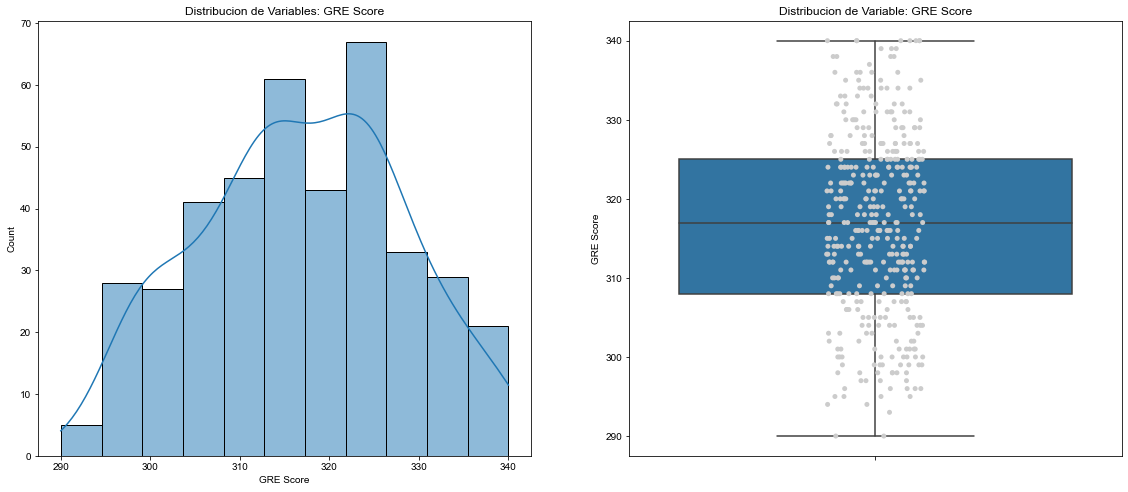

In [17]:
explorarVariableContinua(df,'GRE Score')

In [18]:
df['GRE Score'].describe()

count    400.000000
mean     316.807500
std       11.473646
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

In [19]:
df['GRE Score'].mode()

0    312
1    324
Name: GRE Score, dtype: int64

### Exploración de la Caracteristica: TOEFL Score	

TOEFL Score = Prueba de puntaje de inglés como lengua extranjera

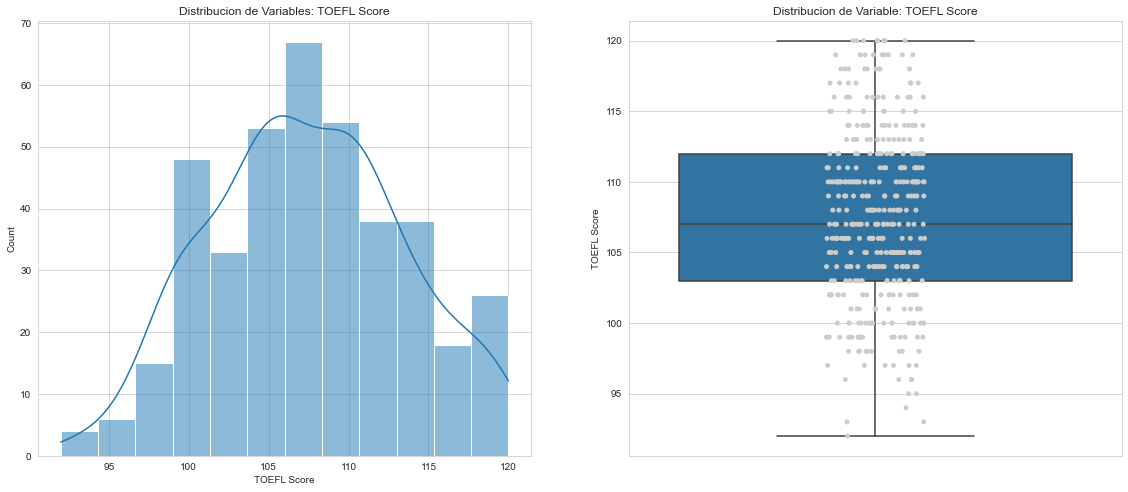

In [20]:
explorarVariableContinua(df,'TOEFL Score')

In [21]:
df['TOEFL Score'].describe()

count    400.000000
mean     107.410000
std        6.069514
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64

In [22]:
df['TOEFL Score'].mode()

0    110
Name: TOEFL Score, dtype: int64

### Exploración de la Caracteristica:  University Rating

University Rating = Rango de la Universidad

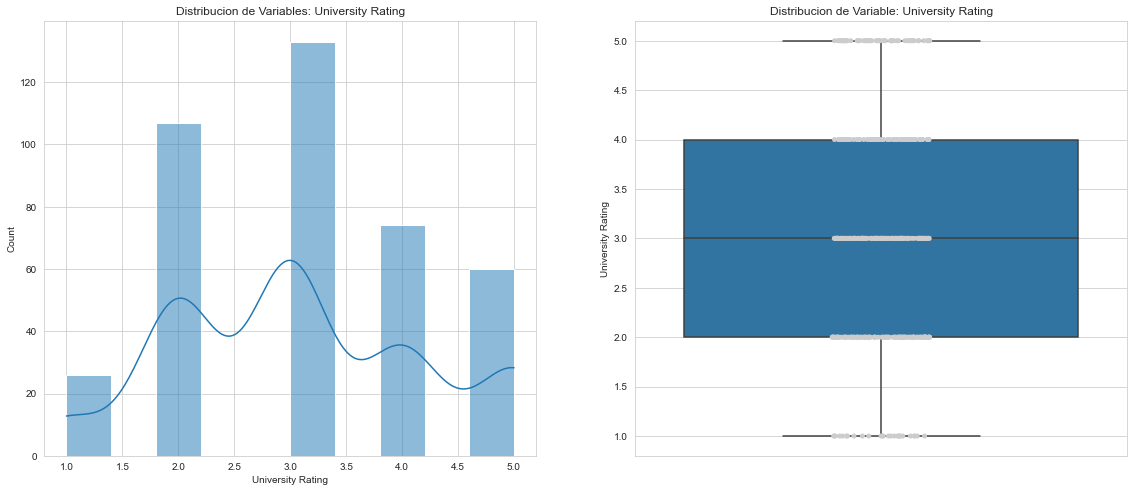

In [23]:
explorarVariableContinua(df,'University Rating')

In [24]:
df['University Rating'].describe()

count    400.000000
mean       3.087500
std        1.143728
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: University Rating, dtype: float64

In [25]:
df['University Rating'].mode()

0    3
Name: University Rating, dtype: int64

### Exploración de la Caracteristica:  SOP

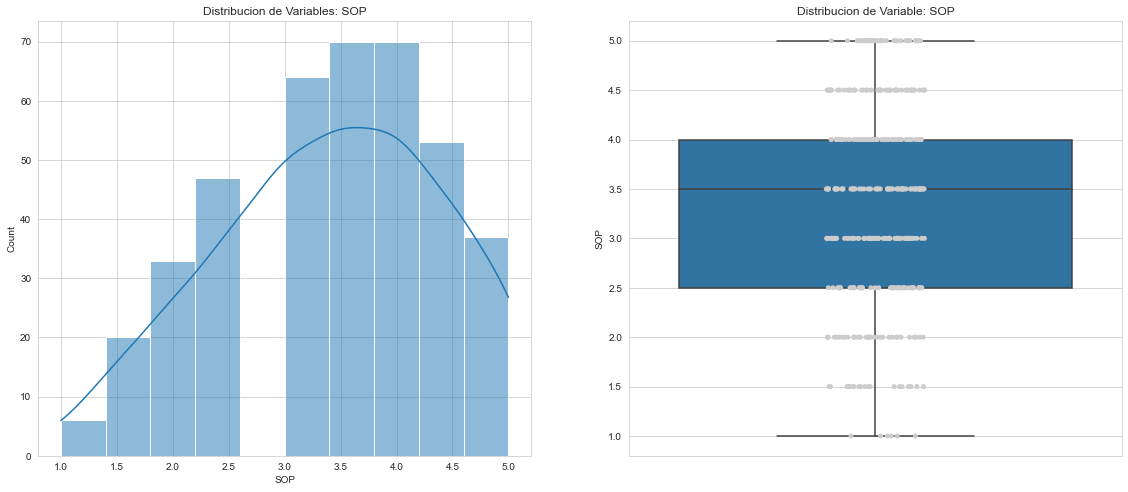

In [26]:
explorarVariableContinua(df,'SOP')

In [27]:
df['SOP'].describe()

count    400.000000
mean       3.400000
std        1.006869
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: SOP, dtype: float64

In [28]:
df['SOP'].mode()

0    3.5
1    4.0
Name: SOP, dtype: float64

### Exploración de la Caracteristica: LOR

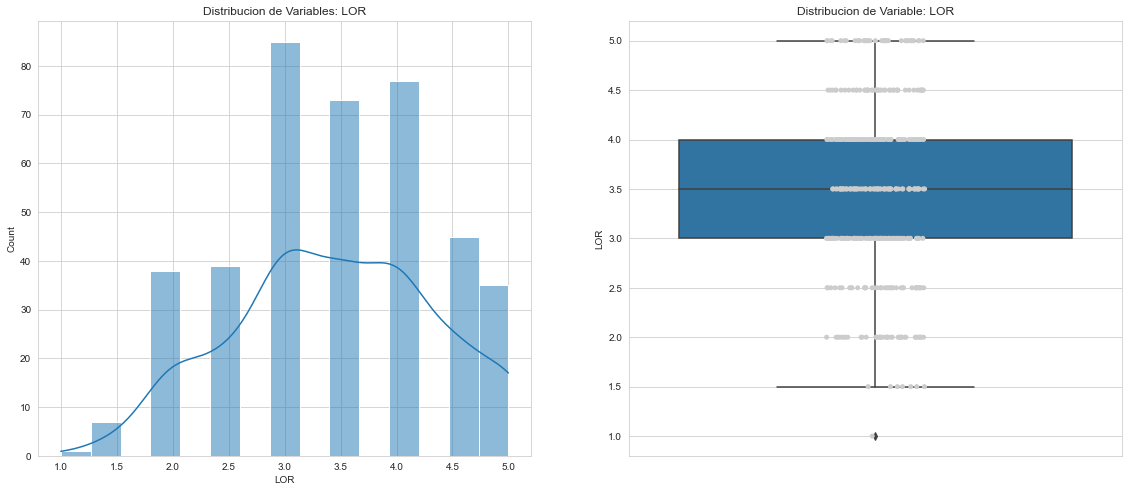

In [29]:
explorarVariableContinua(df,'LOR')

In [30]:
df['LOR'].describe()

count    400.000000
mean       3.452500
std        0.898478
min        1.000000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: LOR, dtype: float64

In [31]:
df['LOR'].mode()

0    3.0
Name: LOR, dtype: float64

### Exploración de la Caracteristica: CGPA

CGPA=Promedio de Calificaciones Acumulativo

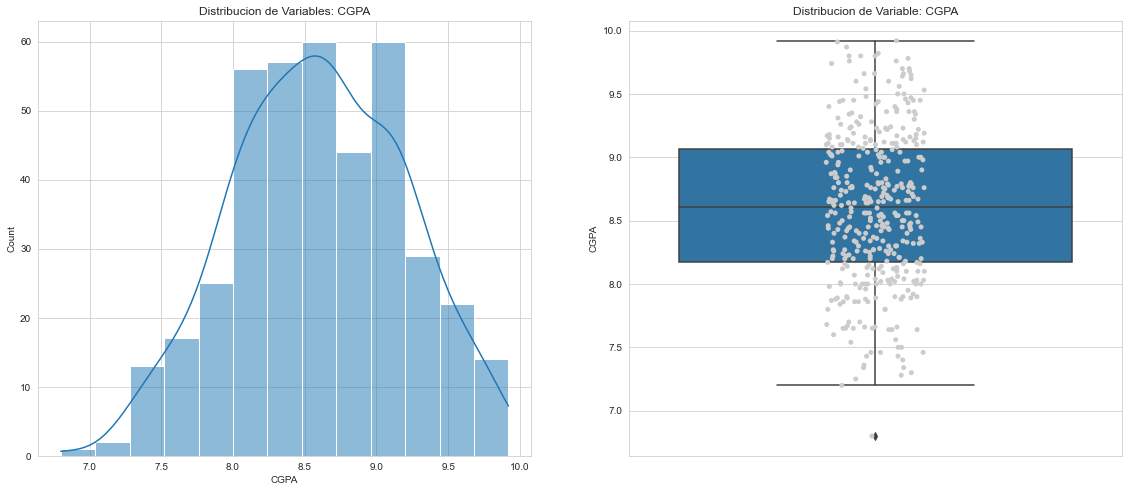

In [32]:
explorarVariableContinua(df,'CGPA')

In [33]:
df['CGPA'].describe()

count    400.000000
mean       8.598925
std        0.596317
min        6.800000
25%        8.170000
50%        8.610000
75%        9.062500
max        9.920000
Name: CGPA, dtype: float64

In [34]:
df['CGPA'].mode()

0    8.0
Name: CGPA, dtype: float64

### Exploración de la Caracteristica:  Research

Research = Investigación


Esta caracteristica está constituida en  1 o 0

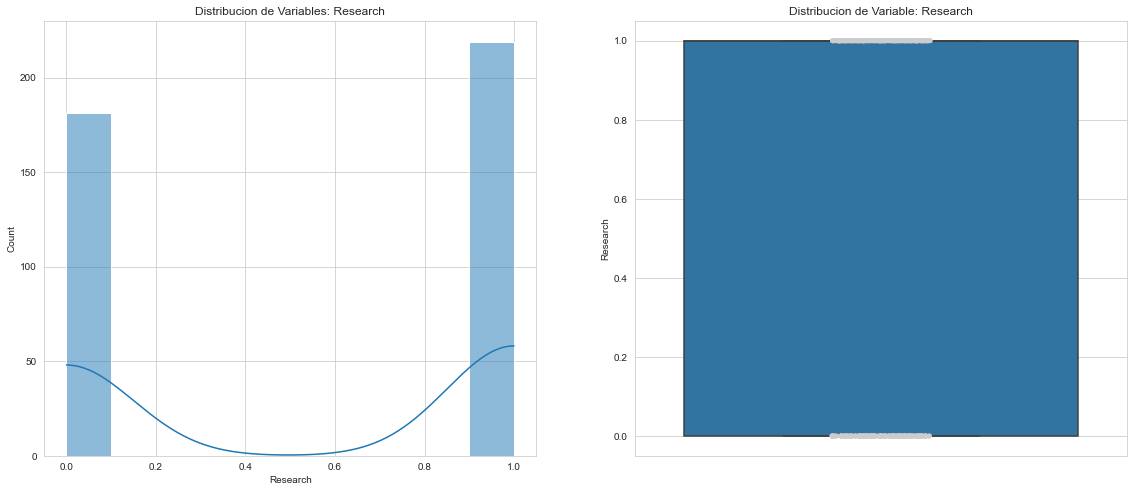

In [35]:
explorarVariableContinua(df,'Research')

In [36]:
df['Research'].describe()

count    400.000000
mean       0.547500
std        0.498362
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Research, dtype: float64

In [37]:
df['Research'].mode()

0    1
Name: Research, dtype: int64

In [38]:
df.groupby('Research').size()

Research
0    181
1    219
dtype: int64

### Exploración de la Caracteristica:  Chance of Admit

Chance of Admit = Posibilidad de Admisión

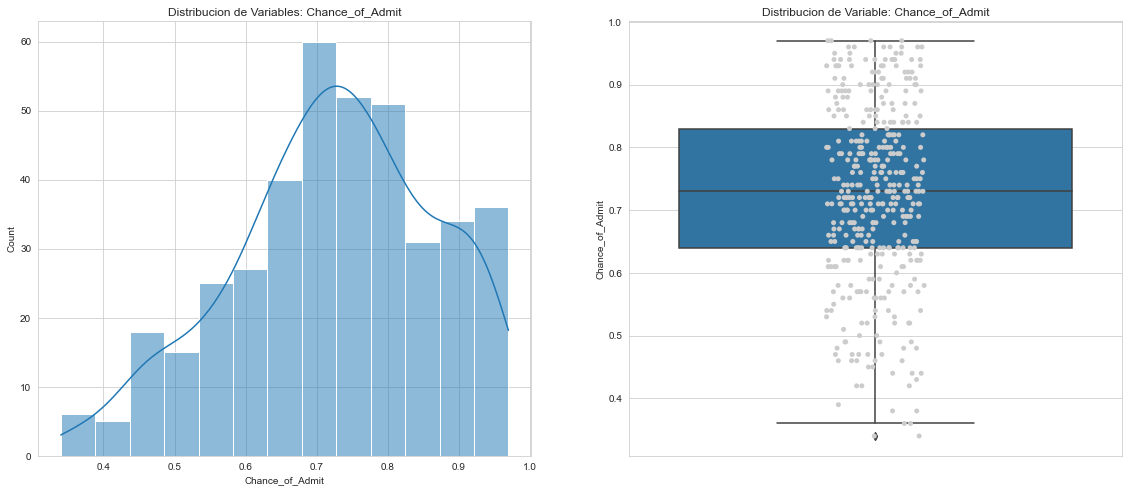

In [39]:
explorarVariableContinua(df,'Chance_of_Admit')

In [40]:
df['Chance_of_Admit'].describe()

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance_of_Admit, dtype: float64

In [41]:
df['Chance_of_Admit'].mode()

0    0.64
Name: Chance_of_Admit, dtype: float64

### **Observar los Boxplots de las Cuatro Caracteristicas Numéricas**

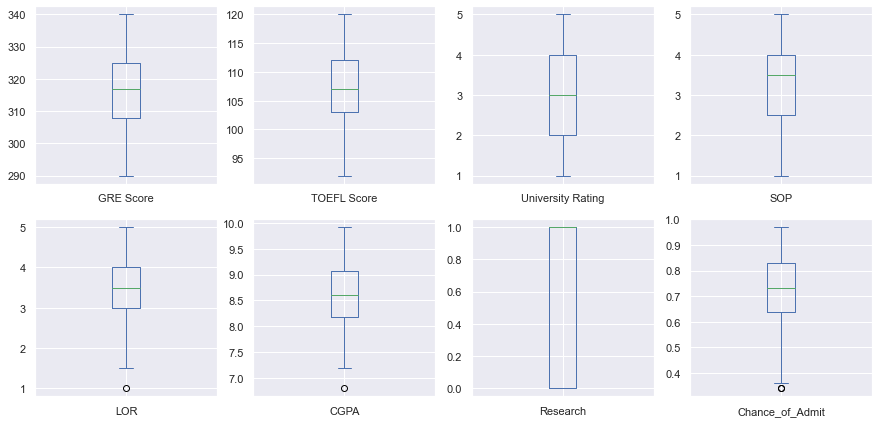

In [90]:
df.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(15,15)})
plt.show()

In [43]:
# limpieza de datos. eliminacion de los valores atipicos en la columna Prestamo

#calcular los cuartiles
Q1=np.percentile(df.Chance_of_Admit, 25)
Q3=np.percentile(df.Chance_of_Admit, 75)

#cálculo de distancia entre cuartiles
IQR = Q3 - Q1

#calculo del valor maximo
maximo = Q3+1.5*IQR

#Consulta de valores de cuartiles 
print("Q1: "+str(Q1))
print("Q3: "+str(Q3))

#consulta del valor máximo
print("Valor Máximo: "+str(maximo))

Q1: 0.64
Q3: 0.83
Valor Máximo: 1.1149999999999998


In [44]:
# limpieza de datos. eliminacion de los valores atipicos en la columna Prestamo

#calcular los cuartiles
Q1=np.percentile(df.LOR, 25)
Q3=np.percentile(df.LOR, 75)

#cálculo de distancia entre cuartiles
IQR = Q3 - Q1

#calculo del valor maximo
maximo = Q3+1.5*IQR

#Consulta de valores de cuartiles 
print("Q1: "+str(Q1))
print("Q3: "+str(Q3))

#consulta del valor máximo
print("Valor Máximo: "+str(maximo))

Q1: 3.0
Q3: 4.0
Valor Máximo: 5.5


In [45]:
#filtrar el dataframe que sobrepasan el valor Maximo

df= df[df.Chance_of_Admit<maximo]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [46]:
df.shape   # al parecer la aplicacion no quitó el outlier. se procede

(400, 8)

**Convierta las variables categóricas de texto en variables categóricas numéricas (ejemplo con get_dummies)**

En este caso el dataset no presenta caracteristicas del tipo texto

### Creacion de la matriz de correlación

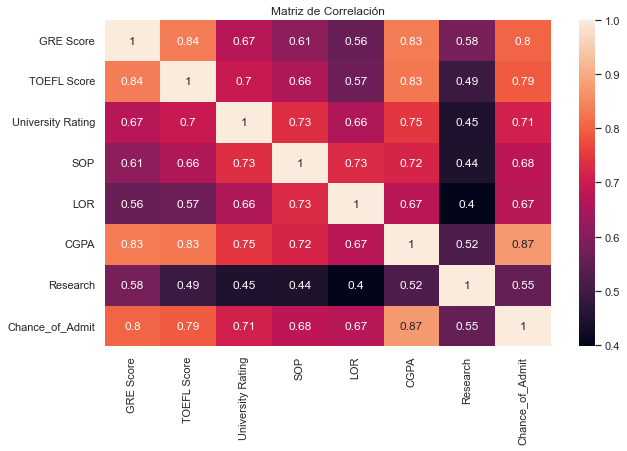

In [47]:
#creacion de la matriz de correlación

correlation_mat = df.corr()
plt.figure(figsize=(10,6))
plt.title("Matriz de Correlación")
sns.heatmap(correlation_mat, annot=True)
plt.show()

**Se observa una gran correlación entre** la variable de Chance_of_Admit y **GRE Score** así como en la caracteristia de **TOEL Score** y finalmente con la caracteristica de **University rating**

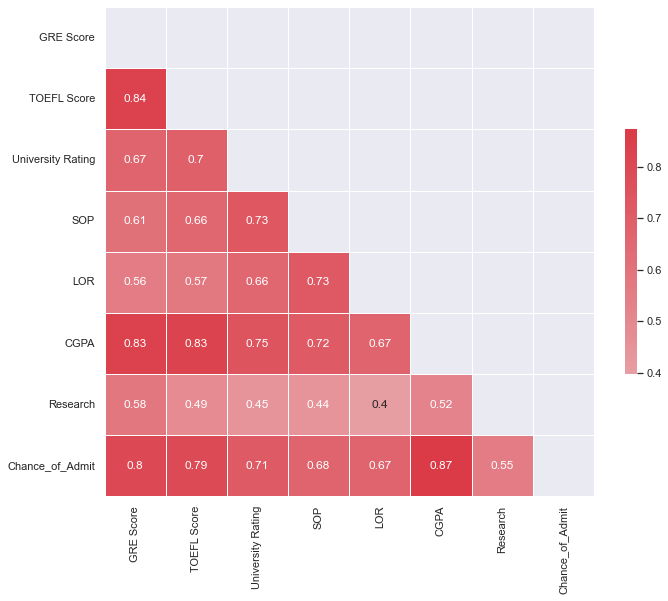

In [48]:
corr= df.corr()

mask = np.zeros_like(corr, dtype=np.bool);mask[np.triu_indices_from(mask)] = True

f, ax=plt.subplots(figsize=(11,9))

cmap= sns.diverging_palette(220,10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={'shrink': .5}, annot= True);

### Separar los datos en un conjunto de datos de entrenamiento y de prueba

En este caso vmaos a determinar la Y como el Chance_of_Admit

In [49]:
X=df.drop('Chance_of_Admit',axis=1)
y=df['Chance_of_Admit']

In [50]:
X.shape

(400, 7)

In [51]:
y.shape

(400,)

## Modelo 1 - SVR Support Vector Regression / Regresión de Soporte Vectorial

In [52]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [53]:
# Escalar los datos
scaler_x = preprocessing.StandardScaler().fit(X)
scaled_x = scaler_x.transform(X.astype(np.float64))
scaled_x

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118,  0.90911166],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  0.90911166],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -1.09997489],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  0.90911166]])

In [54]:
X = scaled_x

In [55]:
np.std(X)

1.0

In [56]:
#Le da una nueva forma al arreglo sin perder los valores originales.
y = y.values.reshape(-1,1)

In [57]:
#Escalar los datos de prueba.
scaler_y = preprocessing.StandardScaler().fit(y)
y = scaler_y.transform(y)
y

array([[ 1.37364801],
       [ 0.25029671],
       [-0.03054111],
       [ 0.53113453],
       [-0.52200731],
       [ 1.23322909],
       [ 0.18008725],
       [-0.31137894],
       [-1.57514914],
       [-1.92619642],
       [-1.43473023],
       [ 0.81197236],
       [ 0.39071562],
       [-0.73263567],
       [-0.80284513],
       [-1.29431132],
       [-0.45179785],
       [-0.52200731],
       [-0.66242622],
       [-0.73263567],
       [-0.59221676],
       [-0.17096003],
       [ 1.51406692],
       [ 1.58427637],
       [ 1.72469529],
       [ 1.51406692],
       [ 0.25029671],
       [-1.99640588],
       [-1.85598697],
       [-1.29431132],
       [-0.52200731],
       [ 0.1098778 ],
       [ 1.30343855],
       [ 1.23322909],
       [ 1.51406692],
       [ 1.09281018],
       [-0.59221676],
       [-1.0134735 ],
       [-1.43473023],
       [-1.71556806],
       [-1.85598697],
       [-1.6453586 ],
       [-1.36452078],
       [ 1.02260073],
       [ 1.30343855],
       [ 1

### Partición de datos

Las muestras se dividen en un 70% de datos para entrenar y un 30% para la prueba.

In [58]:
#Se crea una set de entrenamiento y prueba del set de datos X y Y. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [59]:
regr = svm.SVR()

In [60]:
print(X_train)

y_train = np.ravel(y_train) # ravel hace que la matrix multidimensional pase a unidimensional

print(y_train)

[[-1.72850946 -1.55231291 -0.95202863 ... -0.50426044 -1.55972107
  -1.09997489]
 [-1.64124406 -0.39756367 -0.07660001 ...  0.61012728 -0.09893863
  -1.09997489]
 [ 1.50031044  1.91193482  1.67425725 ...  1.16732114  1.47937803
   0.90911166]
 ...
 [-0.24499762 -0.23259949 -0.95202863 ...  0.05293342 -0.58586611
  -1.09997489]
 [-0.68132463 -1.38734873 -0.07660001 ...  0.61012728 -0.06535742
  -1.09997489]
 [ 0.4531256   0.42725722  1.67425725 ...  0.61012728  0.84133513
   0.90911166]]
[-0.94326404 -0.24116948  1.51406692  0.81197236 -1.78577751  0.03966834
 -0.03054111  0.39071562  0.03966834 -0.24116948 -0.59221676 -0.66242622
 -0.80284513  1.65448583 -1.85598697 -0.73263567 -1.71556806 -0.17096003
  0.46092508  1.09281018 -0.52200731  1.44385746  1.51406692  0.53113453
 -0.24116948  1.37364801 -0.59221676 -0.59221676  1.02260073  1.23322909
 -0.59221676  0.03966834 -0.59221676 -0.59221676 -0.52200731 -2.41766262
  0.81197236  0.53113453  0.25029671  0.03966834  0.95239127  0.460925

In [61]:
#Aplicar el modelo en el set de datos
regr.fit(X_train, y_train)

SVR()

### Evaluación del modelo

In [62]:
print(cross_val_score(regr, X_train, y_train))

regr.score(X_test, y_test)

[0.76026617 0.76204429 0.66518188 0.79397077 0.80767432]


0.7434371986133166

*El desempreño del modelo no es malo se presenta con un resultado de* **0.74**

### Predicción

In [63]:
y_pred = regr.predict(X_test)

#revisar los resultados de las predicciones
y_pred

array([ 0.24949172, -1.04555164,  0.36289653,  1.54176915,  0.13846051,
       -0.02728334,  1.10290956,  0.29610833,  0.89078109,  1.32909973,
        1.62436641, -0.28728883,  0.17305822,  1.38518763,  0.35129809,
        1.53477696, -0.22342066,  0.22206214, -0.35892402,  0.94200014,
        1.46674268, -1.54475104,  0.41491863, -0.06028073, -0.77784585,
       -0.55473135,  0.73088694,  0.67342344, -1.32876107,  0.13216234,
        0.20866819, -0.40879316, -0.09553037, -0.47152549, -0.5308688 ,
        1.54939898,  1.36510092, -0.47073935,  0.75692385, -0.00851045,
       -0.097072  , -0.12850953,  0.2045453 , -0.04888831, -0.20169709,
        1.35412198, -0.38416702,  0.83903078, -0.91109854, -0.49479108,
        0.33307296,  0.12975155, -0.52101647,  1.01829298,  0.93533792,
        0.21626208, -0.5022171 , -0.00554341, -0.13664752,  1.48383356,
       -0.00656072, -0.61009983, -0.27354318,  1.03909372,  0.85181897,
        0.44259422, -0.16343816,  1.37729324, -0.75515462, -1.08

In [64]:
y_pred.shape

(120,)

In [65]:
y_pred = y_pred.reshape(-1, 1)

In [66]:
y_pred = scaler_y.inverse_transform(y_pred)

In [67]:
y_pred

array([[0.75988534],
       [0.57543108],
       [0.7760377 ],
       [0.94394566],
       [0.74407106],
       [0.72046401],
       [0.88143846],
       [0.76652499],
       [0.8512248 ],
       [0.91365495],
       [0.95571006],
       [0.68343118],
       [0.74899885],
       [0.9216436 ],
       [0.77438572],
       [0.94294975],
       [0.69252798],
       [0.75597852],
       [0.67322811],
       [0.85851998],
       [0.93325956],
       [0.50432963],
       [0.78344726],
       [0.71576416],
       [0.61356067],
       [0.64533908],
       [0.82845093],
       [0.82026634],
       [0.53509329],
       [0.74317401],
       [0.75407081],
       [0.6661252 ],
       [0.71074352],
       [0.65719017],
       [0.64873785],
       [0.94503238],
       [0.91878263],
       [0.65730214],
       [0.83215939],
       [0.72313785],
       [0.71052394],
       [0.70604626],
       [0.75348358],
       [0.71738679],
       [0.69562209],
       [0.91721889],
       [0.66963272],
       [0.843

### Desempeño de la predicción

In [68]:
# puntuacion de R2
r2_score(y_test, y_pred)

-0.3179484816677529

In [69]:
# Error promedio al cuadrado 
mean_squared_error(y_test, y_pred)

1.3720641728720484

In [70]:
# Puntuacion d evarianza explicada

explained_variance_score(y_test, y_pred)

0.1801000051938043

In [71]:
#error promedio absoluto 
mean_absolute_error(y_test, y_pred)

0.9077347400845902

In [72]:
#Comparación de las diferentes métricas de evaluación.

print('Puntuacion R2:                              {}'.format(r2_score(y_test, y_pred)))
print('Error promedio al cuadrado:                 {}'.format(mean_squared_error(y_test, y_pred)))
print('Puntuacion d evarianza explicada            {}'.format(explained_variance_score(y_test, y_pred)))
print('error promedio absoluto                     {}'.format(mean_absolute_error(y_test, y_pred)))

Puntuacion R2:                              -0.3179484816677529
Error promedio al cuadrado:                 1.3720641728720484
Puntuacion d evarianza explicada            0.1801000051938043
error promedio absoluto                     0.9077347400845902


## Modelo  2- RIDGE & LASSO


In [74]:
X=df.drop('Chance_of_Admit',axis=1)
y=df['Chance_of_Admit']

In [75]:
X.shape

(400, 7)

In [80]:
#Importamos las librerías necesarias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge 

#Creamos el conjunto de datos de entreanimiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

#Instanciamos el modelo Ridge con los parámetros de alpha y normalización

ridge =Ridge(alpha=0.1, normalize=True)

#Entrenamos el modelo

ridge.fit(X_train, y_train)

#Realizamos las predicciones

ridge_pred= ridge.predict(X_test)

#Consultamos el rendimiento del modelo
ridge.score(X_test, y_test)

0.7904131744443779

**El resultado del modelo mejora en relación al anterior, dandonos un resultado de 0.79**

In [81]:
#Imprimimos los resultados de la regresión lineal realizada

print('El R cuadrado del modelo es '+str(reg.score(X_train, y_train)))

print('El valor de B es: '+str(reg.intercept_))

print('Los coeficientes de la función son: '+str(reg.coef_))

rmse= np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: {}'.format(rmse))

El R cuadrado del modelo es 0.7980824745980806
El valor de B es: -1.0219254636326416
Los coeficientes de la función son: [0.00094551 0.00297756 0.00675827 0.00303436 0.02100842 0.11785519
 0.02433303]
Root Mean Squared Error: 0.20274458822992364


In [82]:
from sklearn.linear_model import Lasso

#Creamos el conjunto de datos de entreanimiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

#Instanciamos el modelo Ridge con los parámetros de alpha y normalización
lasso =Lasso(alpha=0.1, normalize=True)

#Entrenamos el modelo
lasso.fit(X_train, y_train)

#Realizamos las predicciones
lasso_pred= ridge.predict(X_test)

#Consultamos el rendimiento del model

lasso.score(X_test, y_test)

-0.017614068163618102

### Aplicacion de Modelos XGBoost

Importacion de las librerias

In [83]:
#Importamos las librerias necesarias
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

**Seleccionamos las variables features y target**

In [84]:
X=df.drop('Chance_of_Admit',axis=1)
y=df['Chance_of_Admit']

### Partición de datos

Las muestras se dividen en un 70% de datos para entrenar y un 30% para la prueba.

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 123)

In [86]:
#Creamos el modelo de regresión XGB

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123)

#Entrenamos el modelo con los datos de training
xg_reg.fit(X_train, y_train)

#Creamos una predicción usando
preds = xg_reg.predict(X_test)

#Calculamos los indicadores de rendimiento
rmse = np.sqrt(mean_squared_error(y_test, preds))
mae= mean_absolute_error(y_test, preds)

#Imprimimos el puntaje RMSE y MAE obtenido
print('Error cuadratico medio: %f' %(rmse))
print('Error Absoluto medio: %f' %(mae))

Error cuadratico medio: 0.074246
Error Absoluto medio: 0.052271


In [87]:
preds

array([0.890761  , 0.6605553 , 0.74988383, 0.71732557, 0.69523656,
       0.7129136 , 0.5537492 , 0.846122  , 0.4165152 , 0.50852495,
       0.87363005, 0.8454088 , 0.87814087, 0.9281963 , 0.67765194,
       0.4433238 , 0.8366053 , 0.6811787 , 0.63717276, 0.7276284 ,
       0.74860984, 0.86542076, 0.45438433, 0.83998215, 0.6962695 ,
       0.7602096 , 0.80064297, 0.57432926, 0.62961465, 0.5210502 ,
       0.86363375, 0.66637117, 0.7660698 , 0.8138179 , 0.61770177,
       0.5939268 , 0.9165317 , 0.6830542 , 0.7305323 , 0.71732557,
       0.840358  , 0.67471886, 0.695993  , 0.6841845 , 0.7280527 ,
       0.6203374 , 0.50708234, 0.5786648 , 0.67013633, 0.77127445,
       0.7496747 , 0.6540624 , 0.7786372 , 0.6956731 , 0.7277309 ,
       0.92973214, 0.48034474, 0.7198761 , 0.7045242 , 0.79698735,
       0.62172616, 0.59984416, 0.6665252 , 0.69847363, 0.77528995,
       0.6772198 , 0.9309201 , 0.8366053 , 0.91202086, 0.91380787,
       0.8963332 , 0.75511175, 0.70085585, 0.556793  , 0.79206

In [89]:
xg_reg.score(X_train, y_train)

0.9498861364047342

## Seleccione el algrotimo e indicar porqué fue seleccionado.

**XGBoost**

Finalmente para este caso desarrollado se procede a elegir la aplicación del **XGBoost**  en vista que está dando un resultado de predicción del 0.94, ademas que el nivel de los errores **Error cuadratico medio: 0.074246** y **Error Absoluto medio: 0.052271**, son bastante bajos. por lo que para la predicción del data set de Admisiones en el que se debe predecir el valor de Y =  Chance_of_Admit. se prefiere el resultado obtenido con el modelo de **XGBoost** 